In [110]:
from collections import defaultdict
from ast import literal_eval
import numpy as np
fn = 'esmlike-comp.csv'
rates = [str(x) for x in [99, 95, 90, 80, 60, 40, 20]]

In [111]:
ppls = defaultdict(list)
ses = defaultdict(list)
with open(fn, 'r') as f:
    for line in f.readlines():
        if line[:2] in rates:
            line = line.split('\t')
            r = float(line[0])
            c = literal_eval(line[1])
            if line[2][0] == '[':
                ppl = np.mean([float(x) for x in line[2][1:-1].split(' ') if len(x) > 0])
            else:
                ppl = float(line[2])
            se = float(line[3])
            ppls[(r,c)].append(ppl)
            ses[(r,c)].append(se)

In [112]:
# sample count
print(len(ppls[(99.0,True)]))

332


In [106]:
# mean + stdev ppl
import numpy as np
for k,v in ppls.items():
    print(k, '\t{:.2f} +/- {:.2f}'.format(np.mean(v), np.std(v)))

(99.0, False) 	1.95 +/- 0.40
(95.0, False) 	1.49 +/- 0.31
(90.0, False) 	1.52 +/- 0.25
(80.0, False) 	1.66 +/- 0.24
(60.0, False) 	1.90 +/- 0.28
(40.0, False) 	2.02 +/- 0.31
(20.0, False) 	2.05 +/- 0.34
(99.0, True) 	2.07 +/- 0.34
(95.0, True) 	2.03 +/- 0.37
(90.0, True) 	2.01 +/- 0.36
(80.0, True) 	1.96 +/- 0.40
(60.0, True) 	1.97 +/- 0.38
(40.0, True) 	1.97 +/- 0.38
(20.0, True) 	2.00 +/- 0.36


In [105]:
# mean + stdev Shannon entropy
for k, v in ses.items():
    print(k, '\t{:.2f} +/- {:.2f}'.format(np.mean(v), np.std(v)))

(99.0, False) 	3.74 +/- 0.26
(95.0, False) 	3.44 +/- 0.42
(90.0, False) 	3.52 +/- 0.35
(80.0, False) 	3.68 +/- 0.26
(60.0, False) 	3.81 +/- 0.20
(40.0, False) 	3.79 +/- 0.23
(20.0, False) 	3.63 +/- 0.27
(99.0, True) 	3.78 +/- 0.18
(95.0, True) 	3.81 +/- 0.18
(90.0, True) 	3.81 +/- 0.19
(80.0, True) 	3.80 +/- 0.22
(60.0, True) 	3.82 +/- 0.19
(40.0, True) 	3.76 +/- 0.24
(20.0, True) 	3.60 +/- 0.26


In [113]:
# prepare to plot
data = []
for (pk, pv), (sk, sv) in zip(ppls.items(), ses.items()):
    for i in range(len(pv)):
        data.append([pk[0], pk[1], pv[i], sv[i]])
print(data[:10])

[[99.0, False, 3.685776472091675, 2.15], [99.0, False, 3.256967067718506, 1.28], [99.0, False, 1.931811809539795, 0.43], [99.0, False, 8.258623123168945, 4.05], [99.0, False, 1.8243142366409302, 0.38], [99.0, False, 1.7872412204742432, 0.71], [99.0, False, 4.152918338775635, 0.8], [99.0, False, 1.468048095703125, 0.31], [99.0, False, 7.67824125289917, 3.94], [99.0, False, 1.7823385000228882, 0.33]]


(1.0, 5.0)

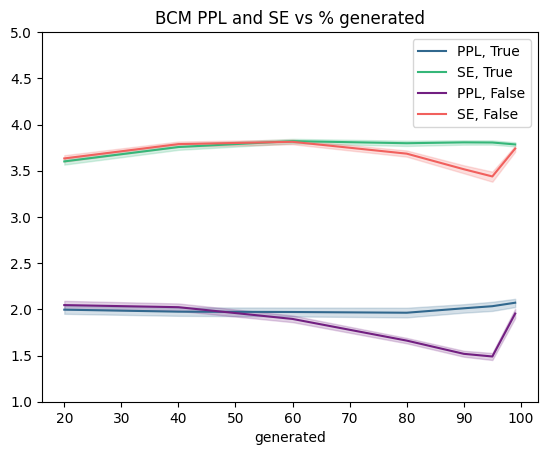

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(data, columns=['generated','contiguous','PPL','SE'])
df = df.set_index('generated')
g1 = sns.lineplot(df[df['contiguous'] == True].drop('contiguous', axis=1).set_axis(['PPL, True', 'SE, True'], axis=1),
             palette='viridis', dashes=False)
g2 = sns.lineplot(df[df['contiguous'] == False].drop('contiguous', axis=1).set_axis(['PPL, False', 'SE, False'], axis=1),
             palette='magma', dashes=False)
plt.title('BCM PPL and SE vs % generated')
plt.ylim([1, 5])

<Axes: ylabel='Count'>

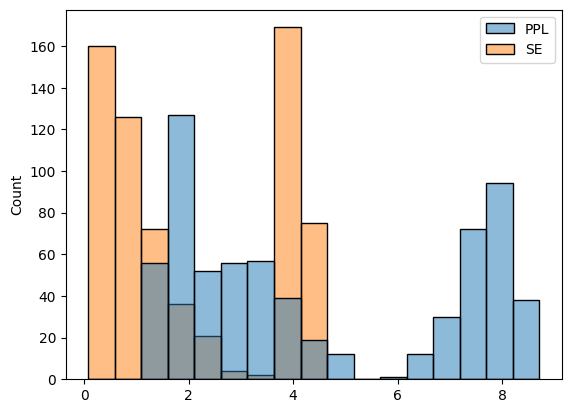

In [117]:
df = pd.DataFrame(data, columns=['generated','contiguous','PPL','SE'])
df = df[df['generated'] == 99.0].set_index('generated').drop('contiguous', axis=1)
sns.histplot(df)